# Automated Annotation of Layouts Segmentation using Layout Parser
Supervisor: Prof. Henry Lovejoy for the Digital Slavery Research Lab

Author: Sushma Akoju (Sushma Anand Akoju)

- This Notebook uses layout Parser which extends Facebook's Detectron software deep learning model. Layout Parser supports historical document layout parsing and detection. Also supports custom model training over custom layout annotations.

- Pre-trained models: https://layout-parser.github.io/platform/
- How-To detect or train a new model using Layout Parser: <a href="https://github.com/Layout-Parser/layout-parser/blob/main/examples/Customizing%20Layout%20Models%20with%20Label%20Studio%20Annotation/Customizing%20Layout%20Models%20with%20Label%20Studio%20Annotation.ipynb" alt="layout"></a>

### Install dependencies and configure environment for Layout Parser

In [ ]:
!sudo apt install poppler-utils
!pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install layoutparser # Install the base layoutparser library with
!pip install "layoutparser[layoutmodels]" # Install DL layout model toolkit
!pip install "layoutparser[ocr]" # Install OCR toolkit

### Import dependencies

In [ ]:
import layoutparser as lp
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

### Mount the Google drive

In [ ]:
%pwd
%cd drive/MyDrive/Colab\ Notebooks
%cd slave-trade-volumes/
%ls

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks'
/content
[Errno 2] No such file or directory: 'slave-trade-volumes/'
/content
sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pdfinfo '/content/drive/MyDrive/Colab Notebooks/slave-trade-volumes/Slave Trade Volume 10/Class B. Correspondence with foreign powers, relating to the slave trade. 1824-1825.pdf'

Title:          Class B. Correspondence with foreign powers, relating to the slave trade. 1824-1825.pdf
Author:         nerdybug
Producer:       Microsoft: Print To PDF
CreationDate:   Fri Jun 17 16:54:25 2022 UTC
ModDate:        Fri Jun 17 16:54:25 2022 UTC
Tagged:         no
UserProperties: no
Suspects:       no
Form:           none
JavaScript:     no
Pages:          4
Encrypted:      no
Page size:      612 x 792 pts (letter)
Page rot:       0
File size:      558088 bytes
Optimized:      no
PDF version:    1.7


In [ ]:
import os
path = "/content/drive/MyDrive/Colab Notebooks/slave-trade-volumes/"
volumes = [ os.path.join(path, folder) for folder in os.listdir(path)]
volumes

['/content/drive/MyDrive/Colab Notebooks/slave-trade-volumes/Slave Trade Volume 10',
 '/content/drive/MyDrive/Colab Notebooks/slave-trade-volumes/Slave Trade Volume 11']

### Display already extracted images from Collections PDF.

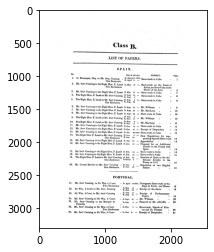

In [ ]:
collections = {}
for volume in volumes:
  collections[os.path.basename(volume)] = []
  for coll in os.listdir(volume):
      collections[os.path.basename(volume)].append(os.path.join(volume, coll))
volume = 'Slave Trade Volume 10'
for coll in collections[volume]:
  if os.path.isdir(coll):
    for im in os.listdir(coll)[:1]:
      image = cv2.imread(os.path.join(coll, im))
      if np.all(image) == np.NaN:
        print("Image is empty or invalid.")
      else:
        image = image[..., ::-1]
        imgplot = plt.imshow(image)

### Now get paths of each of the Collections PDFs.

In [ ]:
collections = {}
for volume in volumes:
  collections[os.path.basename(volume)] = []
  for coll in os.listdir(volume):
    if not os.path.isdir(os.path.join(volume,coll)) and os.path.splitext(coll)[1] == ".pdf" :
      collections[os.path.basename(volume)].append(os.path.join(volume, coll))
collections

{'Slave Trade Volume 10': ['/content/drive/MyDrive/Colab Notebooks/slave-trade-volumes/Slave Trade Volume 10/Class A. Correspondence with the British commissioners at Sierra Leone, the Havannah, Rio de Janeiro, and Surinam, relating to the slave trade. 1824-1825.pdf',
  '/content/drive/MyDrive/Colab Notebooks/slave-trade-volumes/Slave Trade Volume 10/Class A. Correspondence with the British commissioners at Sierra Leone, the Havannah, Rio de Janeiro, and Surinam, relating to the slave trade. 1825-1826.pdf',
  '/content/drive/MyDrive/Colab Notebooks/slave-trade-volumes/Slave Trade Volume 10/Class B. Correspondence with foreign powers, relating to the slave trade. 1824-1825.pdf',
  '/content/drive/MyDrive/Colab Notebooks/slave-trade-volumes/Slave Trade Volume 10/Class B. Correspondence with foreign powers, relating to the slave trade. 1825-1826.pdf'],
 'Slave Trade Volume 11': ['/content/drive/MyDrive/Colab Notebooks/slave-trade-volumes/Slave Trade Volume 11/Class A. Correspondence with 

### Load PDF and extract pdf tokens and PDF pages as images

In [ ]:
this_coll = collections['Slave Trade Volume 10'][0]
pdf_tokens, pdf_images = lp.load_pdf(this_coll, load_images=True)
pdf_images

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=612x792>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=612x792>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=612x792>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=612x792>]

### There are 3 Deep Learning models that annotate tables in historical documents:
https://dell-research-harvard.github.io/HJDataset/

### Layout Model used: faster_rcnn_R_50_FPN_3x

In [ ]:
import detectron2
model = lp.AutoLayoutModel("lp://detectron2/HJDataset/faster_rcnn_R_50_FPN_3x")

config.yml?dl=1: 8.19kB [00:01, 7.73kB/s]
model_final.pth?dl=1: 330MB [00:04, 70.8MB/s]                          


In [ ]:
layout = model.detect(pdf_images[2]) # The page with reference

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


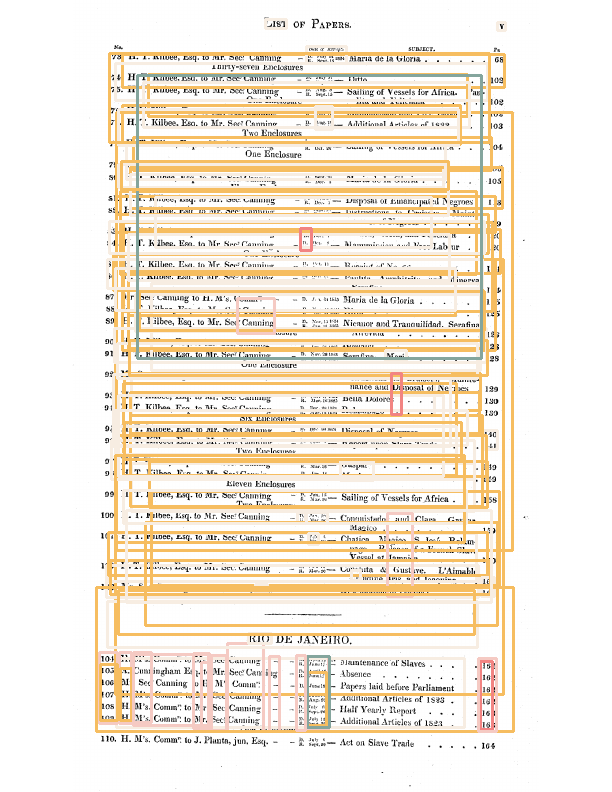

In [ ]:
lp.draw_box(pdf_images[2], layout)

### Layout Model used: mask_rcnn_R_50_FPN_3x

config.yml?dl=1: 8.19kB [00:01, 7.86kB/s]
model_final.pth?dl=1: 351MB [00:04, 76.4MB/s]                          


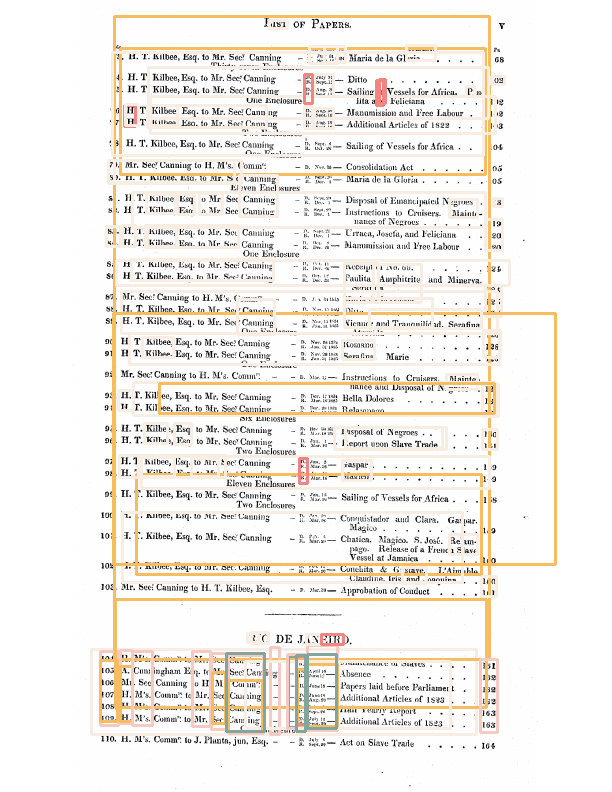

In [ ]:
model1 = lp.AutoLayoutModel("lp://detectron2/HJDataset/mask_rcnn_R_50_FPN_3x")
layout1 = model1.detect(pdf_images[2])
lp.draw_box(pdf_images[2], layout1)

### Layout Model used: retinanet_R_50_FPN_3x

config.yml?dl=1: 8.19kB [00:01, 7.60kB/s]
model_final.pth?dl=1: 303MB [00:23, 13.1MB/s]                           


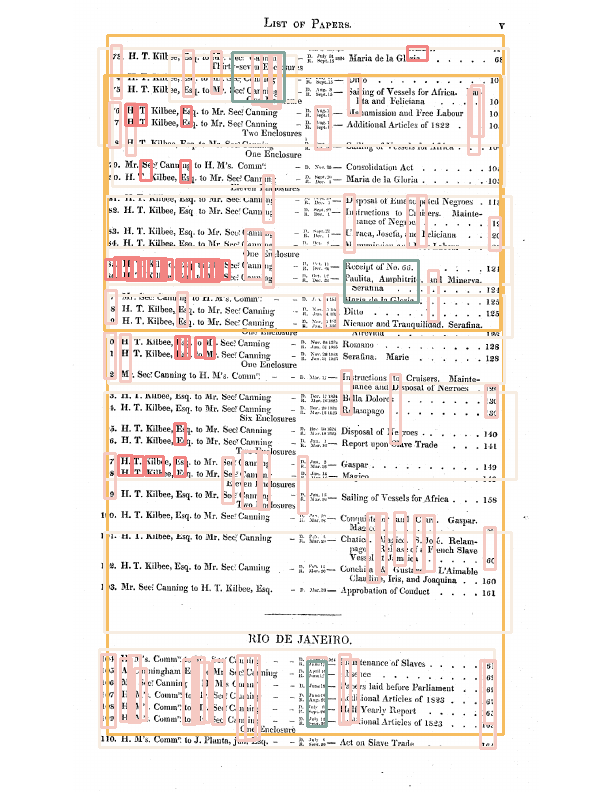

In [ ]:
model2 = lp.AutoLayoutModel("lp://detectron2/HJDataset/retinanet_R_50_FPN_3x")
layout2 = model2.detect(pdf_images[2])
lp.draw_box(pdf_images[2], layout2)

In [ ]:
model3 = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "text", 1: "title", 2: "list", 3:"table", 4:"figure"})
    # Load the deep layout model from the layoutparser API
    # For all the supported model, please check the Model
    # Zoo Page: https://layout-parser.readthedocs.io/en/latest/notes/modelzoo.html
layout_predicted = model3.detect(pdf_images[2])

config.yml?dl=1: 8.19kB [00:00, 8.79kB/s]
model_final.pth?dl=1: 330MB [00:04, 69.9MB/s]                          


In [ ]:
color_map = {
    'text':   'red',
    'title':  'blue',
    'list':   'green',
    'table':  'purple',
    'figure': 'pink',
}

In [ ]:
lp.draw_box(image,
              [b.set(id=f'{b.type}/{b.score:.2f}') for b in layout_predicted],
              color_map=color_map,
              show_element_id=True, id_font_size=10,
              id_text_background_color='grey',
              id_text_color='white')